## Problem Statement:

## Design and implement a machine learning model to predict the win probability of a team in an IPL match based on historical data. Utilize the provided dataset, which includes relevant features such as batting team, bowling team, city, runs left, balls left, wickets left, total run, current run rate (crr), required run rate (rrr), and the match result.

## my objective is to build a robust prediction model that accurately estimates the probability of a team winning a match given the current match conditions.

### install this library

pip install numpy

pip install pandas

pip install matplotlib

pip install seabor

### dataset 

dataset link is (https://www.kaggle.com/datasets/vora1011/ipl-2008-to-2021-all-match-dataset) 

# ipl-win-probability-predictor

## import all the library and chack the datasets

### import library

In [1]:
import numpy as np
import pandas as pd

### uploading dataset 

In [2]:
df = pd.read_csv('IPL_Ball_by_Ball_2008_2022.csv')
df1 = pd.read_csv('IPL_Matches_2008_2022.csv')

In [3]:
df.head()

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals


In [4]:
df.shape

(225954, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225954 entries, 0 to 225953
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   ID                 225954 non-null  int64 
 1   innings            225954 non-null  int64 
 2   overs              225954 non-null  int64 
 3   ballnumber         225954 non-null  int64 
 4   batter             225954 non-null  object
 5   bowler             225954 non-null  object
 6   non-striker        225954 non-null  object
 7   extra_type         12049 non-null   object
 8   batsman_run        225954 non-null  int64 
 9   extras_run         225954 non-null  int64 
 10  total_run          225954 non-null  int64 
 11  non_boundary       225954 non-null  int64 
 12  isWicketDelivery   225954 non-null  int64 
 13  player_out         11151 non-null   object
 14  kind               11151 non-null   object
 15  fielders_involved  7988 non-null    object
 16  BattingTeam        2

the df dataset is 225954 rows and 17 column and this 17 column extra_type, player_out, kind and fielders_involved was null values

In [6]:
df1

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,335986,Kolkata,2008-04-20,2007/08,4,Kolkata Knight Riders,Deccan Chargers,Eden Gardens,Deccan Chargers,bat,N,Kolkata Knight Riders,Wickets,5.0,NaN,DJ Hussey,"['WP Saha', 'BB McCullum', 'RT Ponting', 'SC G...","['AC Gilchrist', 'Y Venugopal Rao', 'VVS Laxma...",BF Bowden,K Hariharan
946,335985,Mumbai,2008-04-20,2007/08,5,Mumbai Indians,Royal Challengers Bangalore,Wankhede Stadium,Mumbai Indians,bat,N,Royal Challengers Bangalore,Wickets,5.0,NaN,MV Boucher,"['L Ronchi', 'ST Jayasuriya', 'DJ Thornely', '...","['S Chanderpaul', 'R Dravid', 'LRPL Taylor', '...",SJ Davis,DJ Harper
947,335984,Delhi,2008-04-19,2007/08,3,Delhi Daredevils,Rajasthan Royals,Feroz Shah Kotla,Rajasthan Royals,bat,N,Delhi Daredevils,Wickets,9.0,NaN,MF Maharoof,"['G Gambhir', 'V Sehwag', 'S Dhawan', 'MK Tiwa...","['T Kohli', 'YK Pathan', 'SR Watson', 'M Kaif'...",Aleem Dar,GA Pratapkumar
948,335983,Chandigarh,2008-04-19,2007/08,2,Kings XI Punjab,Chennai Super Kings,"Punjab Cricket Association Stadium, Mohali",Chennai Super Kings,bat,N,Chennai Super Kings,Runs,33.0,NaN,MEK Hussey,"['K Goel', 'JR Hopes', 'KC Sangakkara', 'Yuvra...","['PA Patel', 'ML Hayden', 'MEK Hussey', 'MS Dh...",MR Benson,SL Shastri


In [7]:
df1.shape

(950, 20)

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               950 non-null    int64  
 1   City             899 non-null    object 
 2   Date             950 non-null    object 
 3   Season           950 non-null    object 
 4   MatchNumber      950 non-null    object 
 5   Team1            950 non-null    object 
 6   Team2            950 non-null    object 
 7   Venue            950 non-null    object 
 8   TossWinner       950 non-null    object 
 9   TossDecision     950 non-null    object 
 10  SuperOver        946 non-null    object 
 11  WinningTeam      946 non-null    object 
 12  WonBy            950 non-null    object 
 13  Margin           932 non-null    float64
 14  method           19 non-null     object 
 15  Player_of_Match  946 non-null    object 
 16  Team1Players     950 non-null    object 
 17  Team2Players    

the df dataset is 950 rows and 20 column and this 20 column City, SuperOver, WinningTeam, Margin, method and Player_of_Match  was null values

## data cleaning

i my crating new dataframe is df2 and drop sum column

In [9]:
df2 = df1.drop(['Team1Players','Team2Players','Umpire1','Umpire2','Player_of_Match',
                'method','Margin','WonBy','SuperOver'], axis=1)
df2.head()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,WinningTeam
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,Gujarat Titans
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,Rajasthan Royals
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,Royal Challengers Bangalore
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,Gujarat Titans
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,Punjab Kings


### i am crating new dataframe using df dataframe 

i am crating dataframe and finding sum columns is('id','Season','Date','MatchNumber','Venue','City','Team1','Team2',
'TossWinner','TossDecision','Innings_1','batting_team_innings_1','Bowling_Team_Innings_1','Total_Runs_Innings_1',
'Innings_2','batting_team_innings_2','Bowling_Team_Innings_2','Total_Runs_Innings_2', 'WinningTeam','losing_team')

In [10]:
total_score_df = df.groupby(['ID', 'innings'])['total_run'].sum().reset_index()
total_score_df

,ID,innings,total_run
0,335982,1,222
1,335982,2,82
2,335983,1,240
3,335983,2,207
4,335984,1,129
...,...,...,...
1923,1312198,2,193
1924,1312199,1,157
1925,1312199,2,161
1926,1312200,1,130


i am finding three column is id , innings and total_run

In [11]:
total_score_innings_1 = total_score_df[total_score_df['innings'] == 2]
total_score_innings_1

df4 = df[df['innings'] == 1].groupby('ID')['BattingTeam'].unique().reset_index(name='Bowling Team')
df4['Bowling Team'] = df4['Bowling Team'].apply(lambda x: x[0] if x else None)
df4.dropna(subset=['Bowling Team'], inplace=True)
total_score_innings_1 = total_score_innings_1.merge(df4[['ID','Bowling Team']], left_on = 'ID', right_on = 'ID')
total_score_innings_1

,ID,innings,total_run,Bowling Team
0,335982,2,82,Kolkata Knight Riders
1,335983,2,207,Chennai Super Kings
2,335984,2,132,Rajasthan Royals
3,335985,2,166,Mumbai Indians
4,335986,2,112,Deccan Chargers
...,...,...,...,...
943,1304116,2,160,Sunrisers Hyderabad
944,1312197,2,191,Rajasthan Royals
945,1312198,2,193,Royal Challengers Bangalore
946,1312199,2,161,Royal Challengers Bangalore


finding new columns is bowling team only innings is 2

In [12]:
total_score_innings_2 = total_score_df[total_score_df['innings'] == 1]
total_score_innings_2

df5 = df[df['innings'] == 2].groupby('ID')['BattingTeam'].unique().reset_index(name='Bowling Team')
df5['Bowling Team'] = df5['Bowling Team'].apply(lambda x: x[0] if x else None)
df5.dropna(subset=['Bowling Team'], inplace=True)
total_score_innings_2 = total_score_innings_2.merge(df5[['ID','Bowling Team']], left_on = 'ID', right_on = 'ID')
total_score_innings_2

,ID,innings,total_run,Bowling Team
0,335982,1,222,Royal Challengers Bangalore
1,335983,1,240,Kings XI Punjab
2,335984,1,129,Delhi Daredevils
3,335985,1,165,Royal Challengers Bangalore
4,335986,1,110,Kolkata Knight Riders
...,...,...,...,...
943,1304116,1,157,Punjab Kings
944,1312197,1,188,Gujarat Titans
945,1312198,1,207,Lucknow Super Giants
946,1312199,1,157,Rajasthan Royals


finding new columns is bowling team only innings is 1

In [13]:
merge_df = total_score_innings_2.merge(total_score_innings_1[['ID','innings','total_run','Bowling Team']],
                                       left_on = 'ID', right_on = 'ID')
merge_df

,ID,innings_x,total_run_x,Bowling Team_x,innings_y,total_run_y,Bowling Team_y
0,335982,1,222,Royal Challengers Bangalore,2,82,Kolkata Knight Riders
1,335983,1,240,Kings XI Punjab,2,207,Chennai Super Kings
2,335984,1,129,Delhi Daredevils,2,132,Rajasthan Royals
3,335985,1,165,Royal Challengers Bangalore,2,166,Mumbai Indians
4,335986,1,110,Kolkata Knight Riders,2,112,Deccan Chargers
...,...,...,...,...,...,...,...
943,1304116,1,157,Punjab Kings,2,160,Sunrisers Hyderabad
944,1312197,1,188,Gujarat Titans,2,191,Rajasthan Royals
945,1312198,1,207,Lucknow Super Giants,2,193,Royal Challengers Bangalore
946,1312199,1,157,Rajasthan Royals,2,161,Royal Challengers Bangalore


In [14]:
merge_df = merge_df.rename(columns={
    'innings_x': 'Innings_1',
    'total_run_x': 'Total_Runs_Innings_1',
    'Bowling Team_x': 'Bowling_Team_Innings_1',
    'innings_y': 'Innings_2',
    'total_run_y': 'Total_Runs_Innings_2',
    'Bowling Team_y': 'Bowling_Team_Innings_2'
})

merge_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 948 entries, 0 to 947
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   ID                      948 non-null    int64 
 1   Innings_1               948 non-null    int64 
 2   Total_Runs_Innings_1    948 non-null    int64 
 3   Bowling_Team_Innings_1  948 non-null    object
 4   Innings_2               948 non-null    int64 
 5   Total_Runs_Innings_2    948 non-null    int64 
 6   Bowling_Team_Innings_2  948 non-null    object
dtypes: int64(5), object(2)
memory usage: 52.0+ KB


i am merge on bowling team in frist innings and bowling team in seconed innings and changing the column name 

In [15]:
df6 = df2.merge(merge_df[['ID','Innings_1','Total_Runs_Innings_1','Bowling_Team_Innings_1',
                          'Innings_2','Total_Runs_Innings_2','Bowling_Team_Innings_2']], left_on = 'ID', right_on = 'ID')
df6.head()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,WinningTeam,Innings_1,Total_Runs_Innings_1,Bowling_Team_Innings_1,Innings_2,Total_Runs_Innings_2,Bowling_Team_Innings_2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,Gujarat Titans,1,130,Gujarat Titans,2,133,Rajasthan Royals
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,Rajasthan Royals,1,157,Rajasthan Royals,2,161,Royal Challengers Bangalore
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,Royal Challengers Bangalore,1,207,Lucknow Super Giants,2,193,Royal Challengers Bangalore
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,Gujarat Titans,1,188,Gujarat Titans,2,191,Rajasthan Royals
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,Punjab Kings,1,157,Punjab Kings,2,160,Sunrisers Hyderabad


marging in merge_df and df2 to crating on stating and finding column name is bowling_team_innings_1 and bowling_team_innings_2

In [16]:
bowling_team_innings_1 = df6['Bowling_Team_Innings_1']
bowling_team_innings_2 = df6['Bowling_Team_Innings_2']
df7 = pd.DataFrame({
    'ID': df6['ID'],
    'batting_team_innings_1': np.where(bowling_team_innings_1 == bowling_team_innings_2, bowling_team_innings_1, 
                                       bowling_team_innings_2),
    'batting_team_innings_2': np.where(bowling_team_innings_1 == bowling_team_innings_2, bowling_team_innings_2, 
                                       bowling_team_innings_1)
})
df7.head()

,ID,batting_team_innings_1,batting_team_innings_2
0,1312200,Rajasthan Royals,Gujarat Titans
1,1312199,Royal Challengers Bangalore,Rajasthan Royals
2,1312198,Royal Challengers Bangalore,Lucknow Super Giants
3,1312197,Rajasthan Royals,Gujarat Titans
4,1304116,Sunrisers Hyderabad,Punjab Kings


marging in df6 on df7 to marging new column in my main dataframe

In [17]:
df8 = df6.merge(df7[['ID','batting_team_innings_1','batting_team_innings_2']],
                left_on = 'ID', right_on = 'ID')
df8.head()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,WinningTeam,Innings_1,Total_Runs_Innings_1,Bowling_Team_Innings_1,Innings_2,Total_Runs_Innings_2,Bowling_Team_Innings_2,batting_team_innings_1,batting_team_innings_2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,Gujarat Titans,1,130,Gujarat Titans,2,133,Rajasthan Royals,Rajasthan Royals,Gujarat Titans
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,Rajasthan Royals,1,157,Rajasthan Royals,2,161,Royal Challengers Bangalore,Royal Challengers Bangalore,Rajasthan Royals
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,Royal Challengers Bangalore,1,207,Lucknow Super Giants,2,193,Royal Challengers Bangalore,Royal Challengers Bangalore,Lucknow Super Giants
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,Gujarat Titans,1,188,Gujarat Titans,2,191,Rajasthan Royals,Rajasthan Royals,Gujarat Titans
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,Punjab Kings,1,157,Punjab Kings,2,160,Sunrisers Hyderabad,Sunrisers Hyderabad,Punjab Kings


arguing the columns

In [18]:
columns = ['ID','Season','Date','MatchNumber','Venue','City','Team1','Team2','TossWinner',
           'TossDecision','Innings_1','batting_team_innings_1','Bowling_Team_Innings_1',
           'Total_Runs_Innings_1','Innings_2','batting_team_innings_2','Bowling_Team_Innings_2',
           'Total_Runs_Innings_2', 'WinningTeam',]
df9 = df8[columns]
df9.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 948 entries, 0 to 947
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   ID                      948 non-null    int64 
 1   Season                  948 non-null    object
 2   Date                    948 non-null    object
 3   MatchNumber             948 non-null    object
 4   Venue                   948 non-null    object
 5   City                    897 non-null    object
 6   Team1                   948 non-null    object
 7   Team2                   948 non-null    object
 8   TossWinner              948 non-null    object
 9   TossDecision            948 non-null    object
 10  Innings_1               948 non-null    int64 
 11  batting_team_innings_1  948 non-null    object
 12  Bowling_Team_Innings_1  948 non-null    object
 13  Total_Runs_Innings_1    948 non-null    int64 
 14  Innings_2               948 non-null    int64 
 15  battin

i am see the null value an i am fill this null values to spliting Venue in (',') and finding city and fill this values on city column in null please.as well as same process on season filling null values

In [19]:
df9['City'] = df9.apply(lambda row: row['Venue'].split(', ')[-1] 
                        if pd.isnull(row['City'])
                        else row['City'], axis=1)

In [20]:
df9['Season'] = df9.apply(lambda row: row['Date'].split('-')[1] 
                        if pd.isnull(row['Date'])
                        else row['Date'], axis=1)
df9.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 948 entries, 0 to 947
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   ID                      948 non-null    int64 
 1   Season                  948 non-null    object
 2   Date                    948 non-null    object
 3   MatchNumber             948 non-null    object
 4   Venue                   948 non-null    object
 5   City                    948 non-null    object
 6   Team1                   948 non-null    object
 7   Team2                   948 non-null    object
 8   TossWinner              948 non-null    object
 9   TossDecision            948 non-null    object
 10  Innings_1               948 non-null    int64 
 11  batting_team_innings_1  948 non-null    object
 12  Bowling_Team_Innings_1  948 non-null    object
 13  Total_Runs_Innings_1    948 non-null    int64 
 14  Innings_2               948 non-null    int64 
 15  battin

changing the datatype on season and date

In [21]:
df9['Season'] = pd.to_datetime(df9['Season'], errors='coerce').dt.year
df9['Season'] = df9['Season'].astype('Int64')
df9['Date'] = pd.to_datetime(df9['Date'])
df9.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 948 entries, 0 to 947
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   ID                      948 non-null    int64         
 1   Season                  948 non-null    Int64         
 2   Date                    948 non-null    datetime64[ns]
 3   MatchNumber             948 non-null    object        
 4   Venue                   948 non-null    object        
 5   City                    948 non-null    object        
 6   Team1                   948 non-null    object        
 7   Team2                   948 non-null    object        
 8   TossWinner              948 non-null    object        
 9   TossDecision            948 non-null    object        
 10  Innings_1               948 non-null    int64         
 11  batting_team_innings_1  948 non-null    object        
 12  Bowling_Team_Innings_1  948 non-null    object    

i am finding last column and change id's

In [22]:
df10 = df9.copy() 
df10['id'] = range(len(df10), 0, -1)

df10 = df10.drop(['ID'], axis=1)

df10['losing_team'] = np.where(df10['WinningTeam'] == df10['Team1'], df10['Team2'], df10['Team1'])

columns = ['id','Season','Date','MatchNumber','Venue','City','Team1','Team2','TossWinner','TossDecision','Innings_1',
           'batting_team_innings_1','Bowling_Team_Innings_1','Total_Runs_Innings_1','Innings_2',
           'batting_team_innings_2','Bowling_Team_Innings_2','Total_Runs_Innings_2', 'WinningTeam','losing_team']
df10 = df10[columns]
df10.head()

,id,Season,Date,MatchNumber,Venue,City,Team1,Team2,TossWinner,TossDecision,Innings_1,batting_team_innings_1,Bowling_Team_Innings_1,Total_Runs_Innings_1,Innings_2,batting_team_innings_2,Bowling_Team_Innings_2,Total_Runs_Innings_2,WinningTeam,losing_team
0,948,2022,2022-05-29,Final,"Narendra Modi Stadium, Ahmedabad",Ahmedabad,Rajasthan Royals,Gujarat Titans,Rajasthan Royals,bat,1,Rajasthan Royals,Gujarat Titans,130,2,Gujarat Titans,Rajasthan Royals,133,Gujarat Titans,Rajasthan Royals
1,947,2022,2022-05-27,Qualifier 2,"Narendra Modi Stadium, Ahmedabad",Ahmedabad,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,1,Royal Challengers Bangalore,Rajasthan Royals,157,2,Rajasthan Royals,Royal Challengers Bangalore,161,Rajasthan Royals,Royal Challengers Bangalore
2,946,2022,2022-05-25,Eliminator,"Eden Gardens, Kolkata",Kolkata,Royal Challengers Bangalore,Lucknow Super Giants,Lucknow Super Giants,field,1,Royal Challengers Bangalore,Lucknow Super Giants,207,2,Lucknow Super Giants,Royal Challengers Bangalore,193,Royal Challengers Bangalore,Lucknow Super Giants
3,945,2022,2022-05-24,Qualifier 1,"Eden Gardens, Kolkata",Kolkata,Rajasthan Royals,Gujarat Titans,Gujarat Titans,field,1,Rajasthan Royals,Gujarat Titans,188,2,Gujarat Titans,Rajasthan Royals,191,Gujarat Titans,Rajasthan Royals
4,944,2022,2022-05-22,70,"Wankhede Stadium, Mumbai",Mumbai,Sunrisers Hyderabad,Punjab Kings,Sunrisers Hyderabad,bat,1,Sunrisers Hyderabad,Punjab Kings,157,2,Punjab Kings,Sunrisers Hyderabad,160,Punjab Kings,Sunrisers Hyderabad


### finding the unique values and chaking

In [23]:
df10['Team1'].unique()

array(['Rajasthan Royals', 'Royal Challengers Bangalore',
       'Sunrisers Hyderabad', 'Delhi Capitals', 'Chennai Super Kings',
       'Gujarat Titans', 'Lucknow Super Giants', 'Kolkata Knight Riders',
       'Punjab Kings', 'Mumbai Indians', 'Kings XI Punjab',
       'Delhi Daredevils', 'Rising Pune Supergiant', 'Gujarat Lions',
       'Rising Pune Supergiants', 'Pune Warriors', 'Deccan Chargers',
       'Kochi Tuskers Kerala'], dtype=object)

In [24]:
df10['Team2'].unique()

array(['Gujarat Titans', 'Rajasthan Royals', 'Lucknow Super Giants',
       'Punjab Kings', 'Mumbai Indians', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Sunrisers Hyderabad', 'Delhi Capitals',
       'Chennai Super Kings', 'Kings XI Punjab', 'Delhi Daredevils',
       'Rising Pune Supergiant', 'Gujarat Lions',
       'Rising Pune Supergiants', 'Pune Warriors', 'Deccan Chargers',
       'Kochi Tuskers Kerala'], dtype=object)

In [25]:
df10['WinningTeam'].unique()

array(['Gujarat Titans', 'Rajasthan Royals',
       'Royal Challengers Bangalore', 'Punjab Kings', 'Mumbai Indians',
       'Lucknow Super Giants', 'Sunrisers Hyderabad', 'Delhi Capitals',
       'Kolkata Knight Riders', 'Chennai Super Kings', 'Kings XI Punjab',
       nan, 'Delhi Daredevils', 'Rising Pune Supergiant', 'Gujarat Lions',
       'Rising Pune Supergiants', 'Pune Warriors', 'Deccan Chargers',
       'Kochi Tuskers Kerala'], dtype=object)

In [26]:
df10['City'].unique()

array(['Ahmedabad', 'Kolkata', 'Mumbai', 'Navi Mumbai', 'Pune', 'Dubai',
       'Sharjah', 'Abu Dhabi', 'Delhi', 'Chennai',
       'Dubai International Cricket Stadium', 'Sharjah Cricket Stadium',
       'Hyderabad', 'Visakhapatnam', 'Chandigarh', 'Bengaluru', 'Jaipur',
       'Indore', 'Bangalore', 'Kanpur', 'Rajkot', 'Raipur', 'Ranchi',
       'Cuttack', 'Dharamsala', 'Kochi', 'Nagpur', 'Johannesburg',
       'Centurion', 'Durban', 'Bloemfontein', 'Port Elizabeth',
       'Kimberley', 'East London', 'Cape Town'], dtype=object)

In [27]:
df10['Venue'].unique()

array(['Narendra Modi Stadium, Ahmedabad', 'Eden Gardens, Kolkata',
       'Wankhede Stadium, Mumbai', 'Brabourne Stadium, Mumbai',
       'Dr DY Patil Sports Academy, Mumbai',
       'Maharashtra Cricket Association Stadium, Pune',
       'Dubai International Cricket Stadium', 'Sharjah Cricket Stadium',
       'Zayed Cricket Stadium, Abu Dhabi', 'Arun Jaitley Stadium, Delhi',
       'MA Chidambaram Stadium, Chepauk, Chennai', 'Sheikh Zayed Stadium',
       'Rajiv Gandhi International Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'MA Chidambaram Stadium',
       'Punjab Cricket Association IS Bindra Stadium', 'Wankhede Stadium',
       'M.Chinnaswamy Stadium', 'Arun Jaitley Stadium', 'Eden Gardens',
       'Sawai Mansingh Stadium',
       'Maharashtra Cricket Association Stadium',
       'Holkar Cricket Stadium',
       'Rajiv Gandhi International Stadium, Uppal',
       'M Chinnaswamy Stadium', 'Feroz Shah Kotla', 'Green Park',
       'Punjab Cricket A

i am crating dataset is teams to playing is recently in ipl

In [28]:
teams = [
    'Sunrisers Hyderabad',
    'Mumbai Indians',
    'Royal Challengers Bangalore',
    'Kolkata Knight Riders',
    'Kings XI Punjab',
    'Chennai Super Kings',
    'Rajasthan Royals',
    'Delhi Capitals',
    'Gujarat Titans', 
    'Lucknow Super Giants'
]

there are three team was changing a team name was Delhi Capitals, Sunrisers Hyderabad and Kings XI Punjab.                   
i am replacing team names

In [29]:
df10['Team1'] = df10['Team1'].str.replace('Delhi Daredevils','Delhi Capitals')
df10['Team1'] = df10['Team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
df10['Team1'] = df10['Team1'].str.replace('Punjab Kings','Kings XI Punjab')

df10['Team2'] = df10['Team2'].str.replace('Delhi Daredevils','Delhi Capitals')
df10['Team2'] = df10['Team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
df10['Team2'] = df10['Team2'].str.replace('Punjab Kings','Kings XI Punjab')

df10['WinningTeam'] = df10['WinningTeam'].str.replace('Delhi Daredevils','Delhi Capitals')
df10['WinningTeam'] = df10['WinningTeam'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
df10['WinningTeam'] = df10['WinningTeam'].str.replace('Punjab Kings','Kings XI Punjab')

df10['TossWinner'] = df10['TossWinner'].str.replace('Delhi Daredevils','Delhi Capitals')
df10['TossWinner'] = df10['TossWinner'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
df10['TossWinner'] = df10['TossWinner'].str.replace('Punjab Kings','Kings XI Punjab')

df10['losing_team'] = df10['losing_team'].str.replace('Delhi Daredevils','Delhi Capitals')
df10['losing_team'] = df10['losing_team'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
df10['losing_team'] = df10['losing_team'].str.replace('Punjab Kings','Kings XI Punjab')

df10['batting_team_innings_1'] = df10['batting_team_innings_1'].str.replace('Delhi Daredevils','Delhi Capitals')
df10['batting_team_innings_1'] = df10['batting_team_innings_1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
df10['batting_team_innings_1'] = df10['batting_team_innings_1'].str.replace('Punjab Kings','Kings XI Punjab')

df10['Bowling_Team_Innings_1'] = df10['Bowling_Team_Innings_1'].str.replace('Delhi Daredevils','Delhi Capitals')
df10['Bowling_Team_Innings_1'] = df10['Bowling_Team_Innings_1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
df10['Bowling_Team_Innings_1'] = df10['Bowling_Team_Innings_1'].str.replace('Punjab Kings','Kings XI Punjab')

df10['batting_team_innings_2'] = df10['batting_team_innings_2'].str.replace('Delhi Daredevils','Delhi Capitals')
df10['batting_team_innings_2'] = df10['batting_team_innings_2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
df10['batting_team_innings_2'] = df10['batting_team_innings_2'].str.replace('Punjab Kings','Kings XI Punjab')

df10['Bowling_Team_Innings_2'] = df10['Bowling_Team_Innings_2'].str.replace('Delhi Daredevils','Delhi Capitals')
df10['Bowling_Team_Innings_2'] = df10['Bowling_Team_Innings_2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
df10['Bowling_Team_Innings_2'] = df10['Bowling_Team_Innings_2'].str.replace('Punjab Kings','Kings XI Punjab')

In [30]:
df10 = df10[df10['Team1'].isin(teams)]
df10 = df10[df10['Team2'].isin(teams)]
df10 = df10[df10['WinningTeam'].isin(teams)]
df10 = df10[df10['TossWinner'].isin(teams)]
df10 = df10[df10['losing_team'].isin(teams)]
df10 = df10[df10['batting_team_innings_1'].isin(teams)]
df10 = df10[df10['Bowling_Team_Innings_1'].isin(teams)]
df10 = df10[df10['batting_team_innings_2'].isin(teams)]
df10 = df10[df10['Bowling_Team_Innings_2'].isin(teams)]

In [31]:
df10.info()

<class 'pandas.core.frame.DataFrame'>
Index: 832 entries, 0 to 947
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      832 non-null    int64         
 1   Season                  832 non-null    Int64         
 2   Date                    832 non-null    datetime64[ns]
 3   MatchNumber             832 non-null    object        
 4   Venue                   832 non-null    object        
 5   City                    832 non-null    object        
 6   Team1                   832 non-null    object        
 7   Team2                   832 non-null    object        
 8   TossWinner              832 non-null    object        
 9   TossDecision            832 non-null    object        
 10  Innings_1               832 non-null    int64         
 11  batting_team_innings_1  832 non-null    object        
 12  Bowling_Team_Innings_1  832 non-null    object        


all data are clear and no null values

## Data Visualization

### import all the library to Visualization on the Data

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [33]:
df10.head()

,id,Season,Date,MatchNumber,Venue,City,Team1,Team2,TossWinner,TossDecision,Innings_1,batting_team_innings_1,Bowling_Team_Innings_1,Total_Runs_Innings_1,Innings_2,batting_team_innings_2,Bowling_Team_Innings_2,Total_Runs_Innings_2,WinningTeam,losing_team
0,948,2022,2022-05-29,Final,"Narendra Modi Stadium, Ahmedabad",Ahmedabad,Rajasthan Royals,Gujarat Titans,Rajasthan Royals,bat,1,Rajasthan Royals,Gujarat Titans,130,2,Gujarat Titans,Rajasthan Royals,133,Gujarat Titans,Rajasthan Royals
1,947,2022,2022-05-27,Qualifier 2,"Narendra Modi Stadium, Ahmedabad",Ahmedabad,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,1,Royal Challengers Bangalore,Rajasthan Royals,157,2,Rajasthan Royals,Royal Challengers Bangalore,161,Rajasthan Royals,Royal Challengers Bangalore
2,946,2022,2022-05-25,Eliminator,"Eden Gardens, Kolkata",Kolkata,Royal Challengers Bangalore,Lucknow Super Giants,Lucknow Super Giants,field,1,Royal Challengers Bangalore,Lucknow Super Giants,207,2,Lucknow Super Giants,Royal Challengers Bangalore,193,Royal Challengers Bangalore,Lucknow Super Giants
3,945,2022,2022-05-24,Qualifier 1,"Eden Gardens, Kolkata",Kolkata,Rajasthan Royals,Gujarat Titans,Gujarat Titans,field,1,Rajasthan Royals,Gujarat Titans,188,2,Gujarat Titans,Rajasthan Royals,191,Gujarat Titans,Rajasthan Royals
4,944,2022,2022-05-22,70,"Wankhede Stadium, Mumbai",Mumbai,Sunrisers Hyderabad,Kings XI Punjab,Sunrisers Hyderabad,bat,1,Sunrisers Hyderabad,Kings XI Punjab,157,2,Kings XI Punjab,Sunrisers Hyderabad,160,Kings XI Punjab,Sunrisers Hyderabad


### stating on data visualization

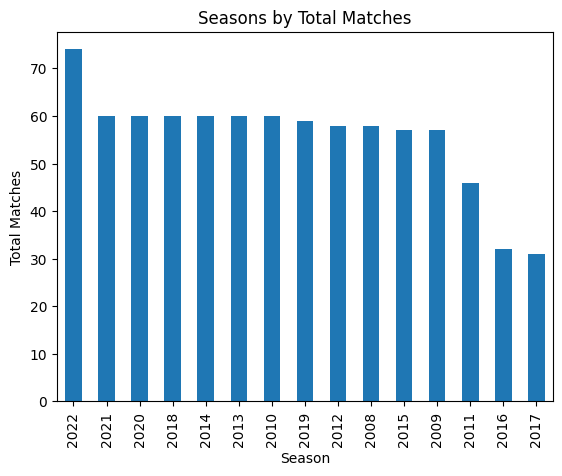

In [34]:
total_match_in_season = df10['Season'].value_counts().plot.bar()
total_match_in_season.set_xlabel('Season')
total_match_in_season.set_ylabel('Total Matches')
total_match_in_season.set_title('Seasons by Total Matches')
plt.show()

on this graph i see the 2022 was high count of matches was play and 2016 and 2017 matches was less and 2021, 2020, 2018, 2014, 2013 and 2010 was matches play in 60. 

averages matches play in each season was ipl is 60 

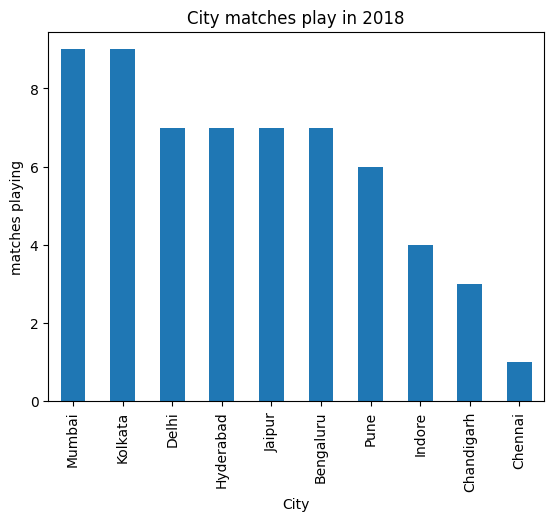

In [35]:
season_2022_cities = df10[df10['Season'] == 2018]['City']
city_counts = season_2022_cities.value_counts()
city_counts.plot(kind='bar', xlabel='City', ylabel='matches playing', title='City matches play in 2018')
plt.show()

was 2018 most of maches play in mumbai and kolkata city and chennai city was minmum matches play

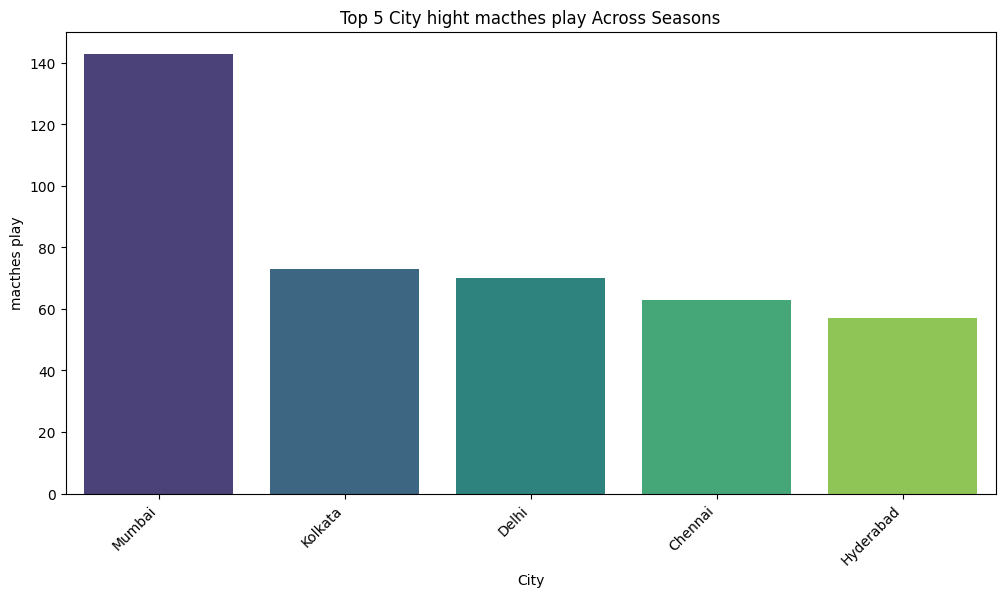

In [36]:
top_cities = df10['City'].value_counts().head(5)
df_top_cities = df10[df10['City'].isin(top_cities.index)]
plt.figure(figsize=(12, 6))
sns.countplot(x='City', data=df_top_cities, order=top_cities.index, palette='viridis')
plt.xlabel('City')
plt.ylabel('macthes play')
plt.title('Top 5 City hight macthes play Across Seasons')
plt.xticks(rotation=45, ha='right')
plt.show()


all the seasons was matches play in hight 5 city was matches play.

mumbai was the city is highest matches play in ipl.

kolkata, delhi and chennai city is was matches play in 60+  in ipl.

hyderabad city was matches play in less than 60 in ipl

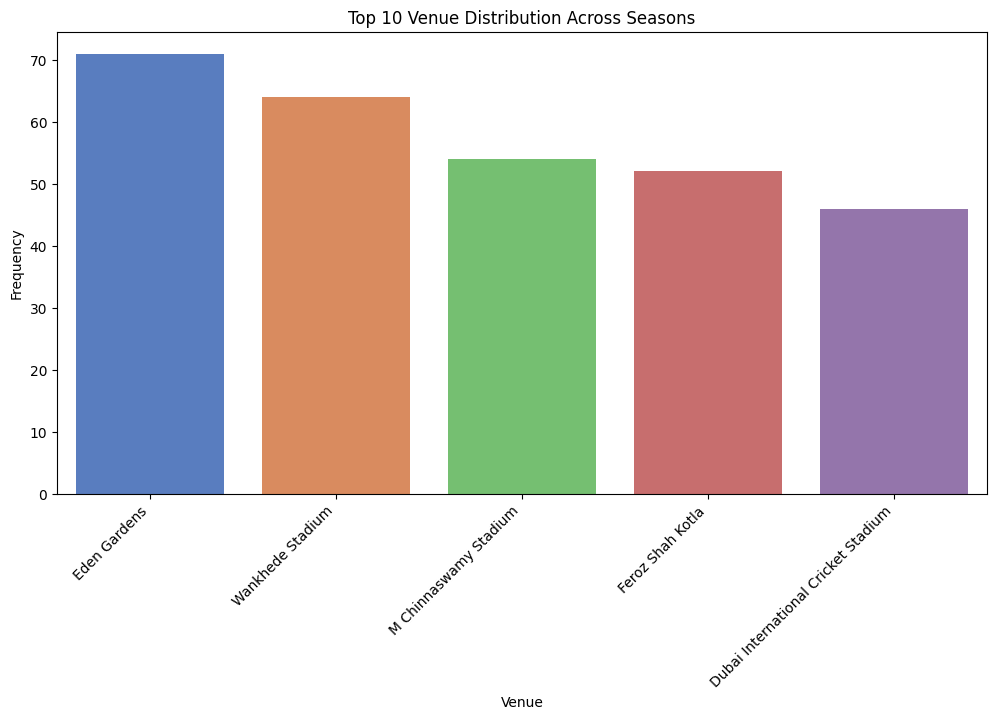

In [37]:
top_venues = df10['Venue'].value_counts().head(5)
df_top_venues = df10[df10['Venue'].isin(top_venues.index)]

plt.figure(figsize=(12, 6))
sns.countplot(x='Venue', data=df_top_venues, order=top_venues.index, palette='muted')
plt.xlabel('Venue')
plt.ylabel('Frequency')
plt.title('Top 10 Venue Distribution Across Seasons')
plt.xticks(rotation=45, ha='right')
plt.show()


all the seasons was matches play in hight 5 Venues was matches play.                                                      
eden gardensai was thVenuety is highest matches play  70+in i and wankhede stadium was the venues is matches play in 60+ in ipl

.m chinnaswamy stadiume and  feroz shah kotlan venuecwas matches play in 50+ in ipl 

dubai international crickect stadiumevenue was matches less than 50+ in iplin ipl

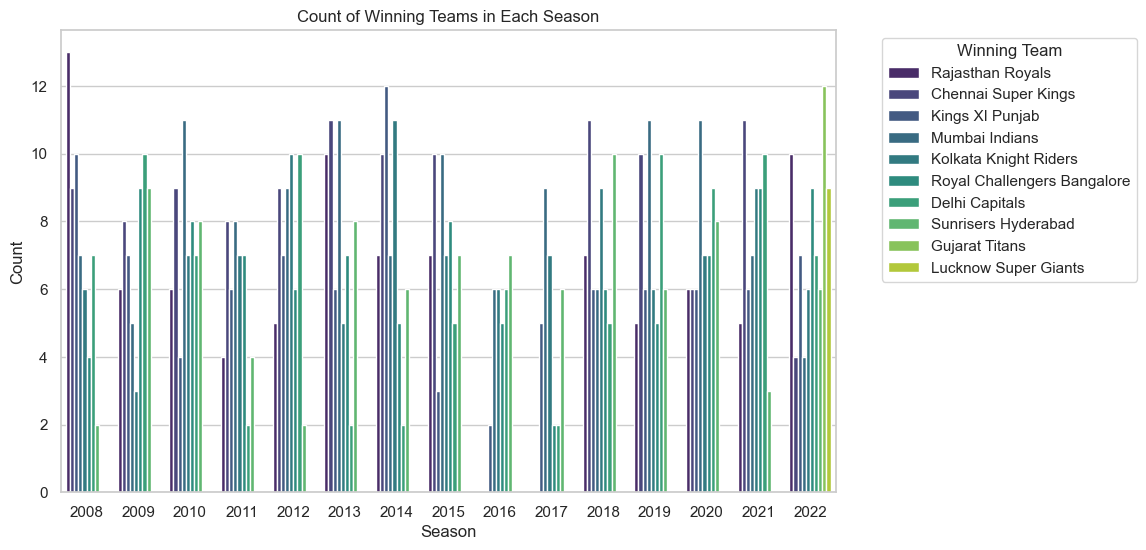

In [38]:
sns.set_theme(style='whitegrid')
plt.figure(figsize=(10, 6))
sns.countplot(x="Season", hue="WinningTeam", data=df10, palette='viridis', edgecolor='w')

# Set labels and title
plt.xlabel('Season')
plt.ylabel('Count')
plt.title('Count of Winning Teams in Each Season')

# Show the plot
plt.legend(title='Winning Team', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


on this graph was finding each season wining team.
season 2008 is rajesthan royals on highest win maches.
season 2009 is royal challengers bangalore on highest win maches. same as well as season 2022 is guja

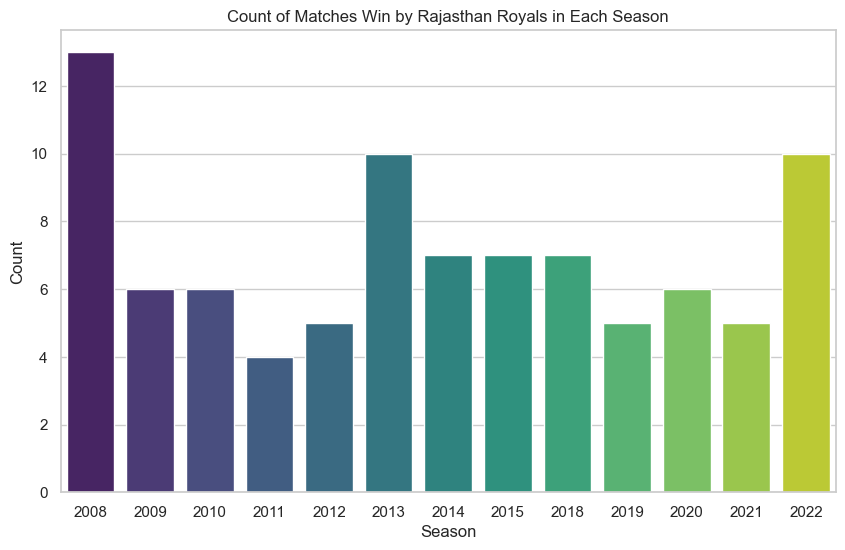

In [39]:
rajasthan_matches = df10[df10['WinningTeam'] == 'Rajasthan Royals']
sns.set_theme(style='whitegrid')
plt.figure(figsize=(10, 6))
sns.countplot(x="Season", data=rajasthan_matches, palette='viridis', edgecolor='w')
plt.xlabel('Season')
plt.ylabel('Count')
plt.title('Count of Matches Win by Rajasthan Royals in Each Season')
plt.show()


this graph i have a specific team was each season winning matches.
on this graph i have finding rajasthan royals each season winning matches.
rajasthan royals was win highest matches in one season is 2008.they are win by 13 matches.
rajasthan royals was win 10 match on two season is 2013 and 2022.
rajasthan royals was bad parfomaces in 2011 was win by only 4 matches.

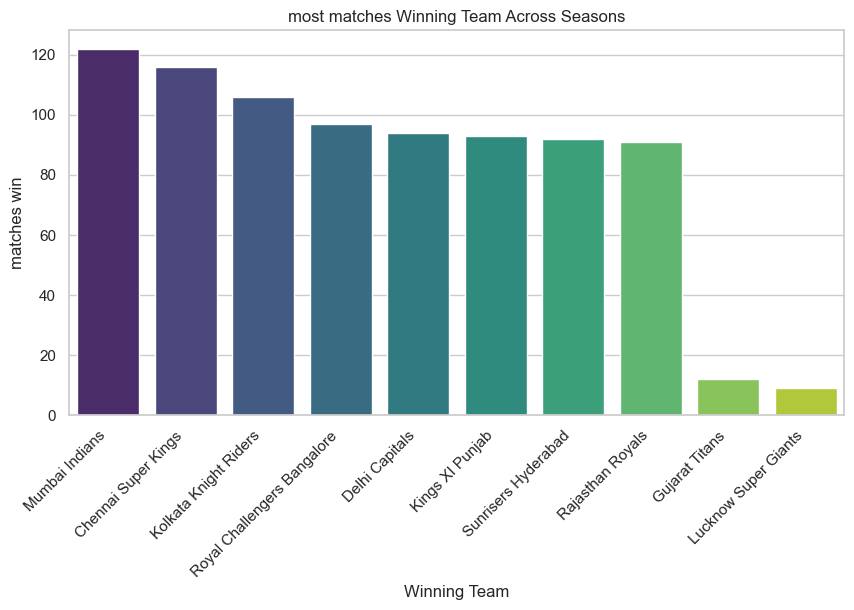

In [40]:
top_Winning_Team = df10['WinningTeam'].value_counts()
df_top_Winning_Team = df10[df10['WinningTeam'].isin(top_Winning_Team.index)]
plt.figure(figsize=(10, 5))
sns.countplot(x='WinningTeam', data=df_top_Winning_Team, order=top_Winning_Team.index, palette='viridis')

plt.xlabel('Winning Team')
plt.ylabel('matches win')
plt.title('most matches Winning Team Across Seasons')

plt.xticks(rotation=45, ha='right')
plt.show()


in this graph, i see mumbai indians , chennai super kings and kolkata knight riders was they are top 3 team in ipl was win most of the matches on all seasons.they are 3 team was win 100+ matches.
other 5 teams on royal challengers bangalore to rajesthan royals in this team was win by 90+ matches in all season
and gujarat titans and lucknow super giants was play in only one season so they are minmum matches win.

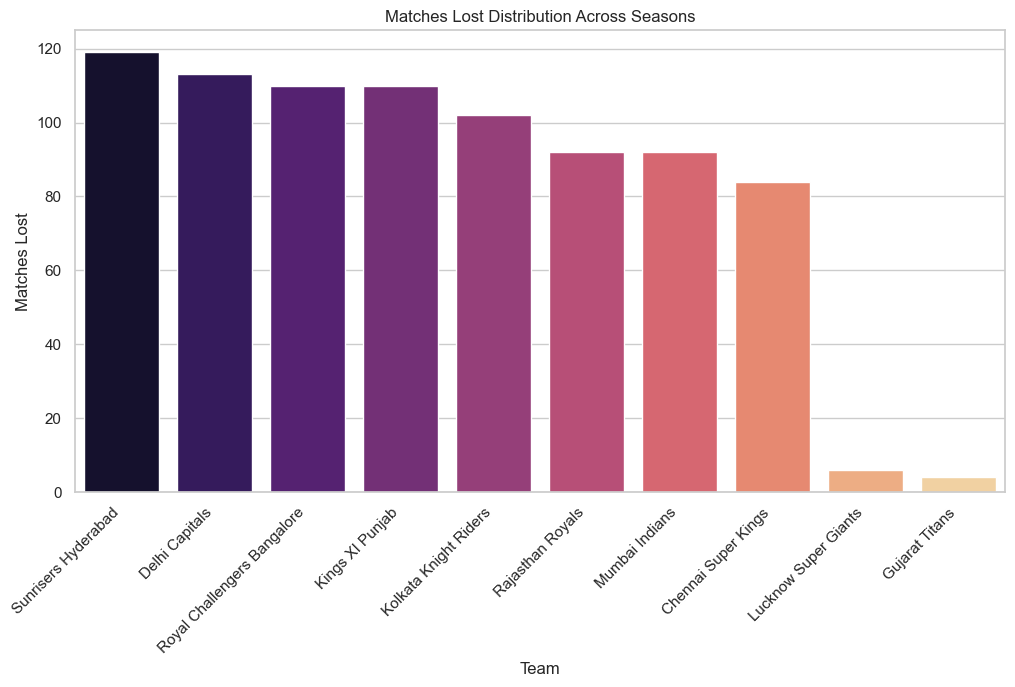

In [41]:
top_Losing_Team = df10['losing_team'].value_counts()
df_top_Losing_Team = df10[df10['losing_team'].isin(top_Losing_Team.index)]

plt.figure(figsize=(12, 6))
sns.countplot(x='losing_team', data=df_top_Losing_Team, order=top_Losing_Team.index, palette='magma') 

plt.xlabel('Team')
plt.ylabel('Matches Lost')
plt.title('Matches Lost Distribution Across Seasons')

plt.xticks(rotation=45, ha='right')
plt.show()


in this graph, i see mumbai indians , chennai super kings and rajesthan royals was they are top 3 team in ipl
was loss minmum matches on all seasons.they are 3 team was less than 90 matches. 
other 4 teams on delhi capitals to kolkata knight riders in this team was loss by 100+ matches in all season 
and gujarat titans and lucknow super giants was play in only one season so they are minmum matches loss.

sunrisers hyderabad was most of matches was loss in all the season in ipl they have loss matches total was 119.

<Figure size 2500x1500 with 0 Axes>

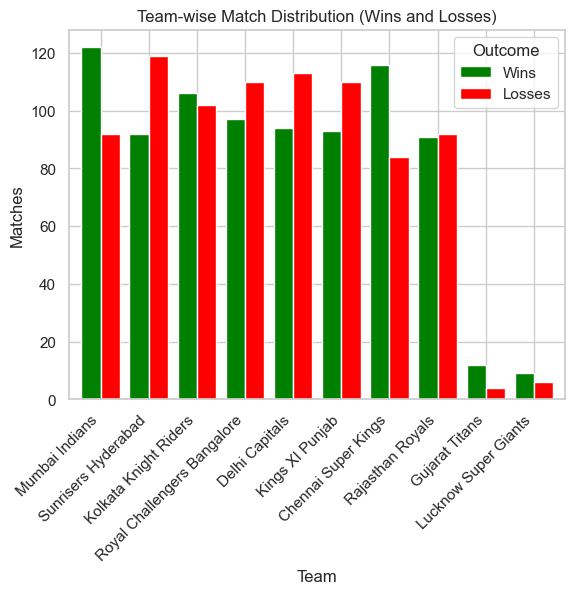

In [42]:
team_counts = pd.concat([df10['WinningTeam'].value_counts(),
                         df10['losing_team'].value_counts()], axis=1, keys=['Wins', 'Losses'])
team_counts['Total'] = team_counts.sum(axis=1)
team_counts = team_counts.sort_values(by='Total', ascending=False)
plt.figure(figsize=(25, 15))
team_counts[['Wins', 'Losses']].plot(kind='bar', color=['green', 'red'], width=0.8)
plt.xlabel('Team')
plt.ylabel('Matches')
plt.title('Team-wise Match Distribution (Wins and Losses)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Outcome', loc='upper right')
plt.show()


in this graph i see the MI and CSK is winning matches mora than loss matches.
in SRH, RCB, DC,KXIP was loss matches mora than winning matches.
KKR and RR was equal matches are win and they are no big differs on win and losses matches.

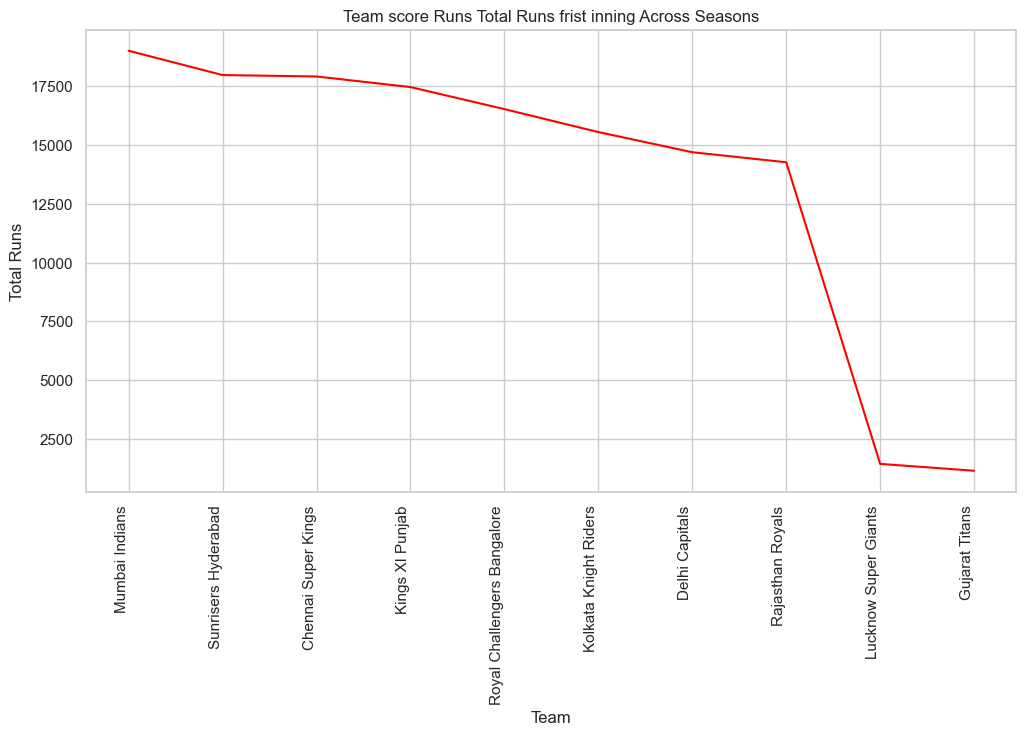

In [43]:
team_counts = df10.groupby('batting_team_innings_1')['Total_Runs_Innings_1'].sum().reset_index()
team_counts = team_counts.sort_values(by='Total_Runs_Innings_1', ascending=False)
plot_color = 'red'
plt.figure(figsize=(12, 6))
plt.plot(team_counts['batting_team_innings_1'], team_counts['Total_Runs_Innings_1'], color=plot_color)
# plt.fill_between(x=team_counts['batting_team_innings_1'], y1=team_counts['Total_Runs_Innings_1'], 
#                  color=plot_color, alpha=0.3)
plt.xlabel('Team')
plt.ylabel('Total Runs')
plt.title('Team score Runs Total Runs frist inning Across Seasons')

plt.xticks(rotation=90, ha='right')
plt.show()


in this graph i see the MI ,SRH, CSK,KXIP was score in first innnings was batting in all of the season and 
all of the matches was play they are score more than 17500 in frist innings.
RCB and KKR was score on more than 15000.
other team was score less than 15000.

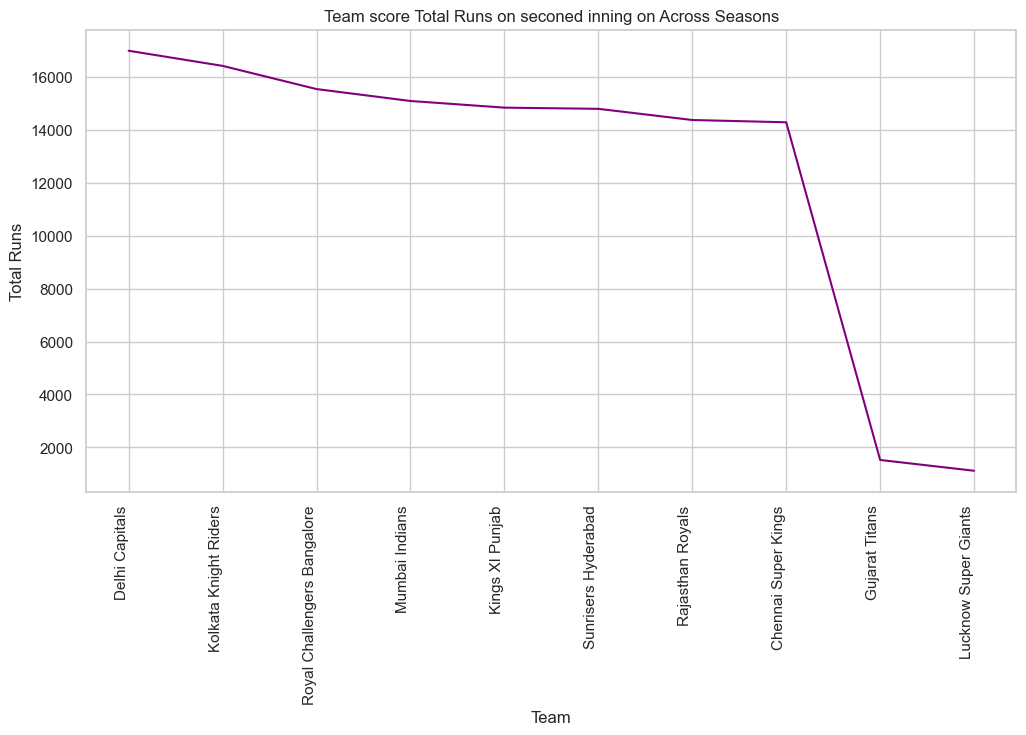

In [44]:
team_counts = df10.groupby('batting_team_innings_2')['Total_Runs_Innings_2'].sum().reset_index()
team_counts = team_counts.sort_values(by='Total_Runs_Innings_2', ascending=False)
plot_color = 'purple'
plt.figure(figsize=(12, 6))
plt.plot(team_counts['batting_team_innings_2'], team_counts['Total_Runs_Innings_2'], color=plot_color)
# plt.fill_between(x=team_counts['batting_team_innings_1'], y1=team_counts['Total_Runs_Innings_1'], 
#                  color=plot_color, alpha=0.3)
plt.xlabel('Team')
plt.ylabel('Total Runs')
plt.title('Team score Total Runs on seconed inning on Across Seasons')

plt.xticks(rotation=90, ha='right')
plt.show()


in this graph i see the DC AND KKR was score in second innnings was batting in all of the season and all of the matches was play they are score more than 16000 in frist innings. RCB,MI,KXIP,SRH and CSK was score on more than 14000. other team was score less than 2000.they are play in one season

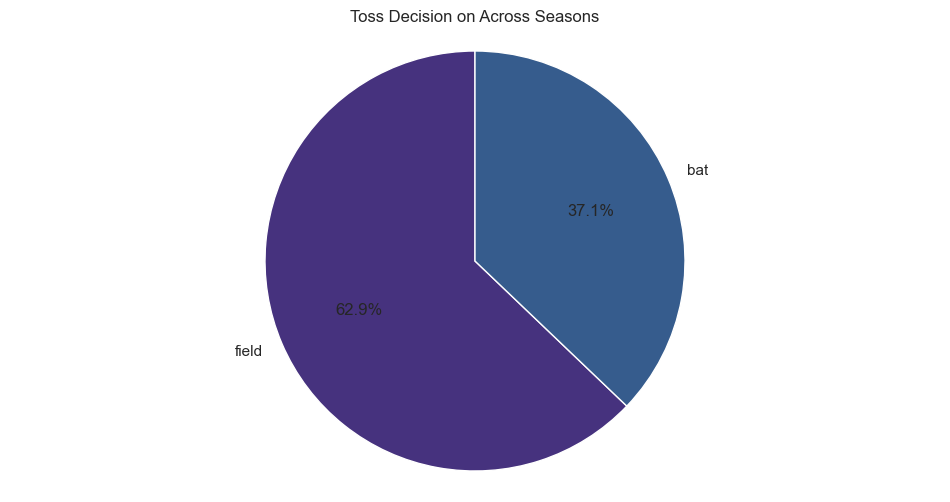

In [45]:
top_TossDecision = df10['TossDecision'].value_counts()
df_top_TossDecision = df10[df10['TossDecision'].isin(top_TossDecision.index)]

plt.figure(figsize=(12, 6))
plt.pie(top_TossDecision, labels=top_TossDecision.index, autopct='%1.1f%%', 
        startangle=90, colors=sns.color_palette('viridis'))
plt.axis('equal') 
plt.title('Toss Decision on Across Seasons')
plt.show()


in this graph was most of team was win the toss they are decision to field first.
62.9% was team decision is first fielding and 37.1% was team decision is first batting in all the season

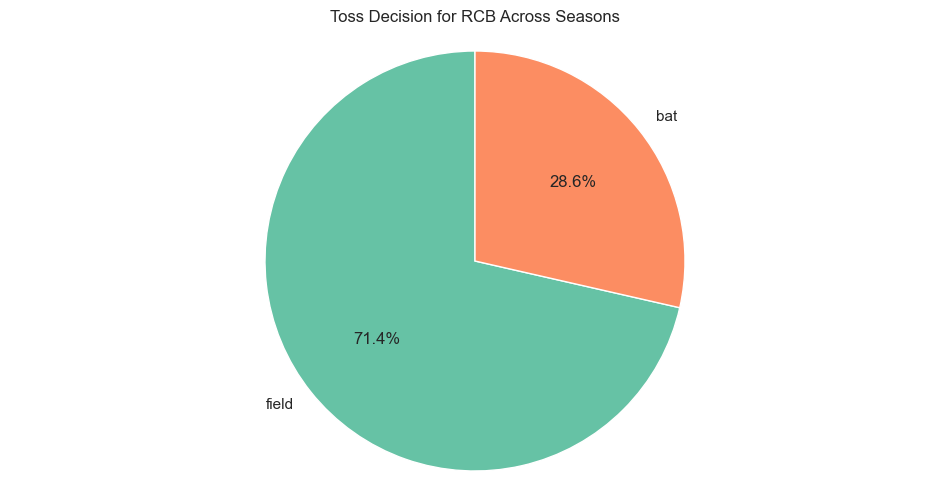

In [46]:
rcb_toss_data = df10[df10['TossWinner'] == 'Royal Challengers Bangalore']
toss_decision_counts = rcb_toss_data['TossDecision'].value_counts()

plt.figure(figsize=(12, 6))
plt.pie(toss_decision_counts, labels=toss_decision_counts.index, autopct='%1.1f%%',
        startangle=90, colors=sns.color_palette('Set2'))
plt.axis('equal') 
plt.title('Toss Decision for RCB Across Seasons')
plt.show()


this graph i have a specific team was RCB in all season they are win the 
toss they are decision was field first in 71.4% and batting first is only 28.6%.


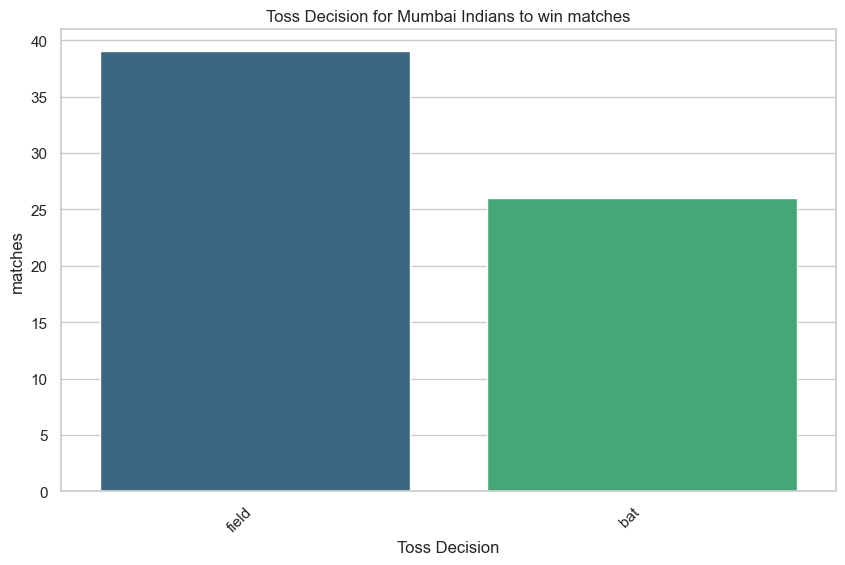

In [47]:
srh_toss_data = df10[(df10['TossWinner'] == 'Mumbai Indians') & (df10['WinningTeam'] == 'Mumbai Indians')]
toss_decision_counts = srh_toss_data['TossDecision'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=toss_decision_counts.index, y=toss_decision_counts, palette='viridis')
plt.xlabel('Toss Decision')
plt.ylabel('matches')
plt.title('Toss Decision for Mumbai Indians to win matches')
plt.xticks(rotation=45, ha='right')
plt.show()


in this graph was specific team is MI.
MI was win the toss and they are decayed was field first they are win more matches is they are win by 38 matches
and they are decayed bat first they are lass matches is win they are win totol matchs on decayed bat first is 26.


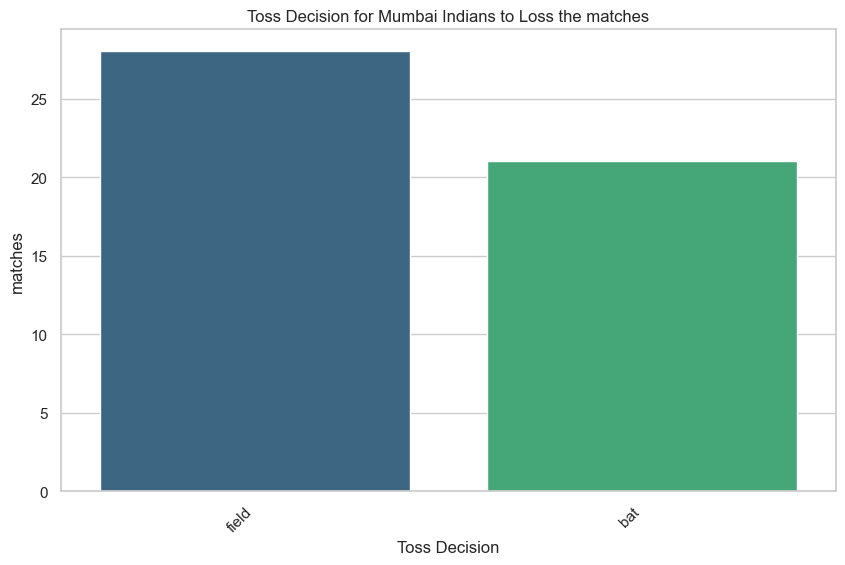

In [48]:
srh_toss_data = df10[(df10['TossWinner'] == 'Mumbai Indians') & (df10['losing_team'] == 'Mumbai Indians')]
toss_decision_counts = srh_toss_data['TossDecision'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=toss_decision_counts.index, y=toss_decision_counts, palette='viridis')
plt.xlabel('Toss Decision')
plt.ylabel('matches')
plt.title('Toss Decision for Mumbai Indians to Loss the matches')
plt.xticks(rotation=45, ha='right')
plt.show()

in this graph was specific team is MI.
MI was win the toss and they are decayed was field first they are loss more matches is they are ioss by 25 matches
and they are decayed bat first they are lass matches is loss they are loss totol matchs on decayed bat first is 21.
they are no big difference to decayed bat first or field first to match was loss 
but they are dig difference to decayed bat first or field first to match was win.

## Feature Enginnering

In [49]:
total_score_df = total_score_df[total_score_df['innings'] == 1]
total_score_df.head()

,ID,innings,total_run
0,335982,1,222
2,335983,1,240
4,335984,1,129
6,335985,1,165
8,335986,1,110


i was finding total runs on first innings 

In [50]:
df11 = df[df['innings'] == 1].groupby('ID')['BattingTeam'].unique().reset_index(name='Bowling Team')
df11['Bowling Team'] = df11['Bowling Team'].apply(lambda x: x[0] if x else None)
df11.dropna(subset=['Bowling Team'], inplace=True)
df11.head()

,ID,Bowling Team
0,335982,Kolkata Knight Riders
1,335983,Chennai Super Kings
2,335984,Rajasthan Royals
3,335985,Mumbai Indians
4,335986,Deccan Chargers


i was finding was bowling team

In [51]:
total_score_df = total_score_df.merge(df11[['ID','Bowling Team']], left_on = 'ID', right_on = 'ID')
total_score_df.head()

,ID,innings,total_run,Bowling Team
0,335982,1,222,Kolkata Knight Riders
1,335983,1,240,Chennai Super Kings
2,335984,1,129,Rajasthan Royals
3,335985,1,165,Mumbai Indians
4,335986,1,110,Deccan Chargers


i was marge two datafram

In [52]:
df = df.merge(total_score_df[['ID', 'Bowling Team']], on='ID')
df.head()

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,Bowling Team
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals,Rajasthan Royals
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals,Rajasthan Royals
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals,Rajasthan Royals
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals,Rajasthan Royals


i was marging on my first datafram was df1 to i am crating new datafram

In [53]:
match_df = df1.merge(total_score_df[['ID','total_run','Bowling Team']], left_on = 'ID', right_on = 'ID')

i was marging on my second datafram was df1 to i am crating new datafram

In [54]:
match_df.head()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,...,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2,total_run,Bowling Team
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,...,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon,130,Rajasthan Royals
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,...,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon,157,Royal Challengers Bangalore
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,...,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough,207,Royal Challengers Bangalore
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,...,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma,188,Rajasthan Royals
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,...,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan,157,Sunrisers Hyderabad


### finding unique values

In [55]:
match_df['Team1'].unique()

array(['Rajasthan Royals', 'Royal Challengers Bangalore',
       'Sunrisers Hyderabad', 'Delhi Capitals', 'Chennai Super Kings',
       'Gujarat Titans', 'Lucknow Super Giants', 'Kolkata Knight Riders',
       'Punjab Kings', 'Mumbai Indians', 'Kings XI Punjab',
       'Delhi Daredevils', 'Rising Pune Supergiant', 'Gujarat Lions',
       'Rising Pune Supergiants', 'Pune Warriors', 'Deccan Chargers',
       'Kochi Tuskers Kerala'], dtype=object)

In [56]:
match_df['Team2'].unique()

array(['Gujarat Titans', 'Rajasthan Royals', 'Lucknow Super Giants',
       'Punjab Kings', 'Mumbai Indians', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Sunrisers Hyderabad', 'Delhi Capitals',
       'Chennai Super Kings', 'Kings XI Punjab', 'Delhi Daredevils',
       'Rising Pune Supergiant', 'Gujarat Lions',
       'Rising Pune Supergiants', 'Pune Warriors', 'Deccan Chargers',
       'Kochi Tuskers Kerala'], dtype=object)

In [57]:
match_df['Bowling Team'].unique()

array(['Rajasthan Royals', 'Royal Challengers Bangalore',
       'Sunrisers Hyderabad', 'Delhi Capitals', 'Chennai Super Kings',
       'Gujarat Titans', 'Lucknow Super Giants', 'Kolkata Knight Riders',
       'Punjab Kings', 'Mumbai Indians', 'Kings XI Punjab',
       'Delhi Daredevils', 'Rising Pune Supergiant', 'Gujarat Lions',
       'Rising Pune Supergiants', 'Pune Warriors', 'Deccan Chargers',
       'Kochi Tuskers Kerala'], dtype=object)

In [58]:
teams = [
    'Sunrisers Hyderabad',
    'Mumbai Indians',
    'Royal Challengers Bangalore',
    'Kolkata Knight Riders',
    'Kings XI Punjab',
    'Chennai Super Kings',
    'Rajasthan Royals',
    'Delhi Capitals',
    'Gujarat Titans', 
    'Lucknow Super Giants'
]

In [59]:
match_df['Team1'] = match_df['Team1'].str.replace('Delhi Daredevils','Delhi Capitals')
match_df['Team2'] = match_df['Team2'].str.replace('Delhi Daredevils','Delhi Capitals')
match_df['Bowling Team'] = match_df['Bowling Team'].str.replace('Delhi Daredevils','Delhi Capitals')

match_df['Team1'] = match_df['Team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
match_df['Team2'] = match_df['Team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
match_df['Bowling Team'] = match_df['Bowling Team'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

match_df['Team1'] = match_df['Team1'].str.replace('Punjab Kings','Kings XI Punjab')
match_df['Team2'] = match_df['Team2'].str.replace('Punjab Kings','Kings XI Punjab')
match_df['Bowling Team'] = match_df['Bowling Team'].str.replace('Punjab Kings','Kings XI Punjab')


In [60]:
match_df = match_df[match_df['Team1'].isin(teams)]
match_df = match_df[match_df['Team2'].isin(teams)]
match_df = match_df[match_df['Bowling Team'].isin(teams)]

In [61]:
match_df.shape

(835, 22)

my dataset was 835 rows and 22 column

In [62]:
match_df['method'].unique()

array([nan, 'D/L'], dtype=object)

In [63]:
match_df['method'] = match_df['method'].fillna(0).replace({'D/L': 1})
match_df['method'] = match_df['method'].astype(int)

i can find the unique value and fill nall value and change the datatype

In [64]:
match_df = match_df[match_df['method'] == 0]

In [65]:
match_df1 = match_df[['ID','City','WinningTeam','total_run','Bowling Team']]
match_df1.head()

,ID,City,WinningTeam,total_run,Bowling Team
0,1312200,Ahmedabad,Gujarat Titans,130,Rajasthan Royals
1,1312199,Ahmedabad,Rajasthan Royals,157,Royal Challengers Bangalore
2,1312198,Kolkata,Royal Challengers Bangalore,207,Royal Challengers Bangalore
3,1312197,Kolkata,Gujarat Titans,188,Rajasthan Royals
4,1304116,Mumbai,Punjab Kings,157,Sunrisers Hyderabad


i was finding the method column, rows are 0 dataset

In [66]:
df12 = match_df1.merge(df,on='ID')

In [67]:
df12 = df12[df12['innings'] == 2]

In [68]:
df12.head()

,ID,City,WinningTeam,total_run_x,Bowling Team_x,innings,overs,ballnumber,batter,bowler,...,batsman_run,extras_run,total_run_y,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,Bowling Team_y
120,1312200,Ahmedabad,Gujarat Titans,130,Rajasthan Royals,2,0,1,WP Saha,TA Boult,...,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,Rajasthan Royals
121,1312200,Ahmedabad,Gujarat Titans,130,Rajasthan Royals,2,0,2,WP Saha,TA Boult,...,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,Rajasthan Royals
122,1312200,Ahmedabad,Gujarat Titans,130,Rajasthan Royals,2,0,3,WP Saha,TA Boult,...,1,0,1,0,0,NaN,NaN,NaN,Gujarat Titans,Rajasthan Royals
123,1312200,Ahmedabad,Gujarat Titans,130,Rajasthan Royals,2,0,4,Shubman Gill,TA Boult,...,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,Rajasthan Royals
124,1312200,Ahmedabad,Gujarat Titans,130,Rajasthan Royals,2,0,5,Shubman Gill,TA Boult,...,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,Rajasthan Royals


 i am finding dataset only was my innings is 2

### finding my dataset to run ML model

In [69]:
df12['total_run_y'] = pd.to_numeric(df12['total_run_y'], errors='coerce')
df12['current_score'] = df12.groupby('ID')['total_run_y'].cumsum()
df12['runs_left'] = df12['total_run_x'] - df12['current_score']
df12['balls_left'] = 120 - (df12['overs'] * 6 + df12['ballnumber'])
df12.head()

,ID,City,WinningTeam,total_run_x,Bowling Team_x,innings,overs,ballnumber,batter,bowler,...,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,Bowling Team_y,current_score,runs_left,balls_left
120,1312200,Ahmedabad,Gujarat Titans,130,Rajasthan Royals,2,0,1,WP Saha,TA Boult,...,0,0,NaN,NaN,NaN,Gujarat Titans,Rajasthan Royals,0,130,119
121,1312200,Ahmedabad,Gujarat Titans,130,Rajasthan Royals,2,0,2,WP Saha,TA Boult,...,0,0,NaN,NaN,NaN,Gujarat Titans,Rajasthan Royals,0,130,118
122,1312200,Ahmedabad,Gujarat Titans,130,Rajasthan Royals,2,0,3,WP Saha,TA Boult,...,0,0,NaN,NaN,NaN,Gujarat Titans,Rajasthan Royals,1,129,117
123,1312200,Ahmedabad,Gujarat Titans,130,Rajasthan Royals,2,0,4,Shubman Gill,TA Boult,...,0,0,NaN,NaN,NaN,Gujarat Titans,Rajasthan Royals,1,129,116
124,1312200,Ahmedabad,Gujarat Titans,130,Rajasthan Royals,2,0,5,Shubman Gill,TA Boult,...,0,0,NaN,NaN,NaN,Gujarat Titans,Rajasthan Royals,1,129,115


In [70]:
df12['player_out'] = df12['player_out'].replace([np.inf, -np.inf], np.nan).fillna(0)
df12['player_out'] = pd.to_numeric(df12['player_out'], errors='coerce')
df12['player_out'] = df12['player_out'].replace([np.inf, -np.inf, np.nan], -1)
df12['player_out'] = df12['player_out'].astype(int)
df12['player_out'] = df12['player_out'].apply(lambda x: 1 if x != 0 else 0)
df12['wickets'] = df12.groupby('ID')['player_out'].cumsum()
df12['wickets_left'] = 10 - df12['wickets']
df12.head()

,ID,City,WinningTeam,total_run_x,Bowling Team_x,innings,overs,ballnumber,batter,bowler,...,player_out,kind,fielders_involved,BattingTeam,Bowling Team_y,current_score,runs_left,balls_left,wickets,wickets_left
120,1312200,Ahmedabad,Gujarat Titans,130,Rajasthan Royals,2,0,1,WP Saha,TA Boult,...,0,NaN,NaN,Gujarat Titans,Rajasthan Royals,0,130,119,0,10
121,1312200,Ahmedabad,Gujarat Titans,130,Rajasthan Royals,2,0,2,WP Saha,TA Boult,...,0,NaN,NaN,Gujarat Titans,Rajasthan Royals,0,130,118,0,10
122,1312200,Ahmedabad,Gujarat Titans,130,Rajasthan Royals,2,0,3,WP Saha,TA Boult,...,0,NaN,NaN,Gujarat Titans,Rajasthan Royals,1,129,117,0,10
123,1312200,Ahmedabad,Gujarat Titans,130,Rajasthan Royals,2,0,4,Shubman Gill,TA Boult,...,0,NaN,NaN,Gujarat Titans,Rajasthan Royals,1,129,116,0,10
124,1312200,Ahmedabad,Gujarat Titans,130,Rajasthan Royals,2,0,5,Shubman Gill,TA Boult,...,0,NaN,NaN,Gujarat Titans,Rajasthan Royals,1,129,115,0,10


In [71]:
df12['crr'] = (df12['current_score']*6)/(120 - df12['balls_left'])
df12['rrr'] = (df12['runs_left']*6)/df12['balls_left']

In [72]:
def result(row):
    return 1 if row['BattingTeam'] == row['WinningTeam'] else 0

In [73]:
df12['result'] = df12.apply(result,axis=1)

on this 5 cell i was finding columns on dataset is 'runs_left','balls_left',                'wickets_left','total_run_x','crr','rrr','result'

In [74]:
final_df = df12[['BattingTeam','Bowling Team_x','City','runs_left','balls_left',
                 'wickets_left','total_run_x','crr','rrr','result']]

creating new dataframe same specific column

In [75]:
final_df.head()

,BattingTeam,Bowling Team_x,City,runs_left,balls_left,wickets_left,total_run_x,crr,rrr,result
120,Gujarat Titans,Rajasthan Royals,Ahmedabad,130,119,10,130,0.0,6.554622,1
121,Gujarat Titans,Rajasthan Royals,Ahmedabad,130,118,10,130,0.0,6.610169,1
122,Gujarat Titans,Rajasthan Royals,Ahmedabad,129,117,10,130,2.0,6.615385,1
123,Gujarat Titans,Rajasthan Royals,Ahmedabad,129,116,10,130,1.5,6.672414,1
124,Gujarat Titans,Rajasthan Royals,Ahmedabad,129,115,10,130,1.2,6.730435,1


In [76]:
final_df = final_df.sample(final_df.shape[0])

In [77]:
final_df.sample()

,BattingTeam,Bowling Team_x,City,runs_left,balls_left,wickets_left,total_run_x,crr,rrr,result
128752,Sunrisers Hyderabad,Delhi Capitals,Delhi,45,37,7,114,4.987952,7.297297,1


i was finding any specific id on dataset they give me column name and rows data

In [78]:
final_df.dropna(inplace=True)

In [79]:
final_df = final_df[final_df['balls_left'] != 0]

## Model Architecture

### train_test_split

In [80]:
X = final_df.iloc[:,:-1]
y = final_df.iloc[:,-1]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

i am converting my dataset to train test split

In [81]:
X_train

,BattingTeam,Bowling Team_x,City,runs_left,balls_left,wickets_left,total_run_x,crr,rrr
181850,Kolkata Knight Riders,Rajasthan Royals,Cape Town,29,22,5,150,7.408163,7.909091
12203,Rajasthan Royals,Gujarat Titans,Mumbai,163,105,9,192,11.600000,9.314286
21199,Delhi Capitals,Mumbai Indians,Sharjah,55,52,6,129,6.529412,6.346154
192164,Kolkata Knight Riders,Rajasthan Royals,Jaipur,71,33,5,196,8.620690,12.909091
119450,Delhi Daredevils,Chennai Super Kings,Chennai,37,2,1,168,6.661017,111.000000
...,...,...,...,...,...,...,...,...,...
108022,Kings XI Punjab,Sunrisers Hyderabad,Hyderabad,24,17,6,205,10.543689,8.470588
160395,Kings XI Punjab,Mumbai Indians,Chandigarh,47,40,8,154,8.025000,7.050000
36126,Rajasthan Royals,Mumbai Indians,Abu Dhabi,17,20,8,195,10.680000,5.100000
160643,Deccan Chargers,Royal Challengers Bangalore,Bangalore,83,43,7,184,7.870130,11.581395


### appling ColumnTransforme on 'BattingTeam','Bowling Team_x','City'

In [82]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

trf = ColumnTransformer([
    ('trf',OneHotEncoder(sparse=False,drop='first'),['BattingTeam','Bowling Team_x','City'])
]
,remainder='passthrough')

i have use to One Hot Encoder to Column Transforme

### train first model is Logistic Regression

In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [84]:
pipe = Pipeline(steps=[
    ('step1',trf),
    ('step2',LogisticRegression(solver='liblinear'))
])

In [85]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['BattingTeam',
                                                   'Bowling Team_x',
                                                   'City'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [86]:
y_pred = pipe.predict(X_test)

#### LogisticRegression model accuracy is 81.49 % . it good accuracy for find probability

In [87]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8176185648304607

In [88]:
pipe.predict_proba(X_test)[10]

array([0.35321795, 0.64678205])

### train second model is random forest classifier

In [89]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.pipeline import Pipeline

In [90]:
# pipe = Pipeline(steps=[
#     ('step1',trf),
#     ('step2',RandomForestClassifier())
# ])

In [91]:
# pipe.fit(X_train,y_train)

In [92]:
# y_pred = pipe.predict(X_test)

#### random forest classifier model accuracy is 99.81 % . it very good accuracy 

In [93]:
# from sklearn.metrics import accuracy_score
# accuracy_score(y_test,y_pred)

In [94]:
# pipe.predict_proba(X_test)[10]

### train thread model is decision tree classifier

In [95]:
# from sklearn.pipeline import Pipeline
# from sklearn.tree import DecisionTreeClassifier

In [96]:
# pipe = Pipeline(steps=[
#     ('step1',trf),
#     ('step2',DecisionTreeClassifier())
# ])

In [97]:
# pipe.fit(X_train,y_train)

#### random forest classifier model accuracy is 98.92 % . it very good accuracy

In [98]:
# from sklearn.metrics import accuracy_score
# accuracy_score(y_test,y_pred)

In [99]:
# y_pred = pipe.predict(X_test)

In [100]:
# pipe.predict_proba(X_test)[10]

#### i am train 3 model was Logistic Regression, random forest classifier and decision tree classifier.
in this 3 model was Logistic Regression accuracy is 81% , random forest classifier accuracy is 99% and decision tree 
classifier accuracy is 98% .

random forest classifier and decision tree classifie was accuracy is 99% but i was use this 2 model the give me a
one side win probability was (win or loss)

but Logistic Regression they give me a accuracy is 81% it good but i am expected to 90% but it is good
in Logistic Regression  model give me both side win probability was (win or loss)
and this is the bast model to finding win probability was (win or loss) so i am use this model


## over by over wining predictor

In [101]:
def match_summary(row):
    print("BattingTeam-" + row['BattingTeam'] + " | Bowling Team_x-" + row['Bowling Team_x'] + " | Target- " + str(row['total_run_x']))
    

In [102]:
def match_progression(x_df, match_id, pipe):
    df2 = x_df[x_df['ID'] == match_id]
    df2 = df2[(df2['ballnumber'] == 6)]
    
    temp_df = df2[['BattingTeam', 'Bowling Team_x', 'City', 'runs_left', 'balls_left', 'wickets_left', 'total_run_x', 'crr', 'rrr']].dropna()
    temp_df = temp_df[temp_df['balls_left'] != 0]
    
    result = pipe.predict_proba(temp_df)
    
    temp_df['lose'] = np.round(result.T[0] * 100, 1)
    temp_df['win'] = np.round(result.T[1] * 100, 1)
    temp_df['end_of_over'] = range(1, temp_df.shape[0] + 1)
    
    target = temp_df['total_run_x'].values[0]
    
    runs = list(temp_df['runs_left'].values)
    new_runs = runs[:]
    runs.insert(0, target)
    temp_df['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)
    
    wickets = list(temp_df['wickets_left'].values)
    new_wickets = wickets[:]
    new_wickets.insert(0, 10)
    wickets.append(0)
    w = np.array(wickets)
    nw = np.array(new_wickets)
    temp_df['wickets_in_over'] = (nw - w)[0:temp_df.shape[0]]
    
    print("Target-", target)
    
    temp_df = temp_df[['end_of_over', 'runs_after_over', 'wickets_in_over', 'lose', 'win']]
    
    return temp_df, target

i am wright on code to finding  every over by over this columns (end_of_over ,runs_after_over	,wickets_in_over,	lose probability ,	win probability) and target.
on this code i am finding  batting team was (win or loss) match

In [103]:
temp_df,target = match_progression(df12,1254108	,pipe)
temp_df

Target- 165


,end_of_over,runs_after_over,wickets_in_over,lose,win
23306,1,5,0,42.0,58.0
23312,2,5,0,42.4,57.6
23318,3,13,0,30.0,70.0
23325,4,13,0,20.3,79.7
23331,5,15,0,11.9,88.1
23337,6,5,0,12.3,87.7
23344,7,2,1,24.3,75.7
23350,8,5,0,24.8,75.2
23357,9,12,0,17.6,82.4
23363,10,4,1,30.0,70.0


### over by over wining predictor Data Visualization

Text(0.5, 1.0, 'Target-165')

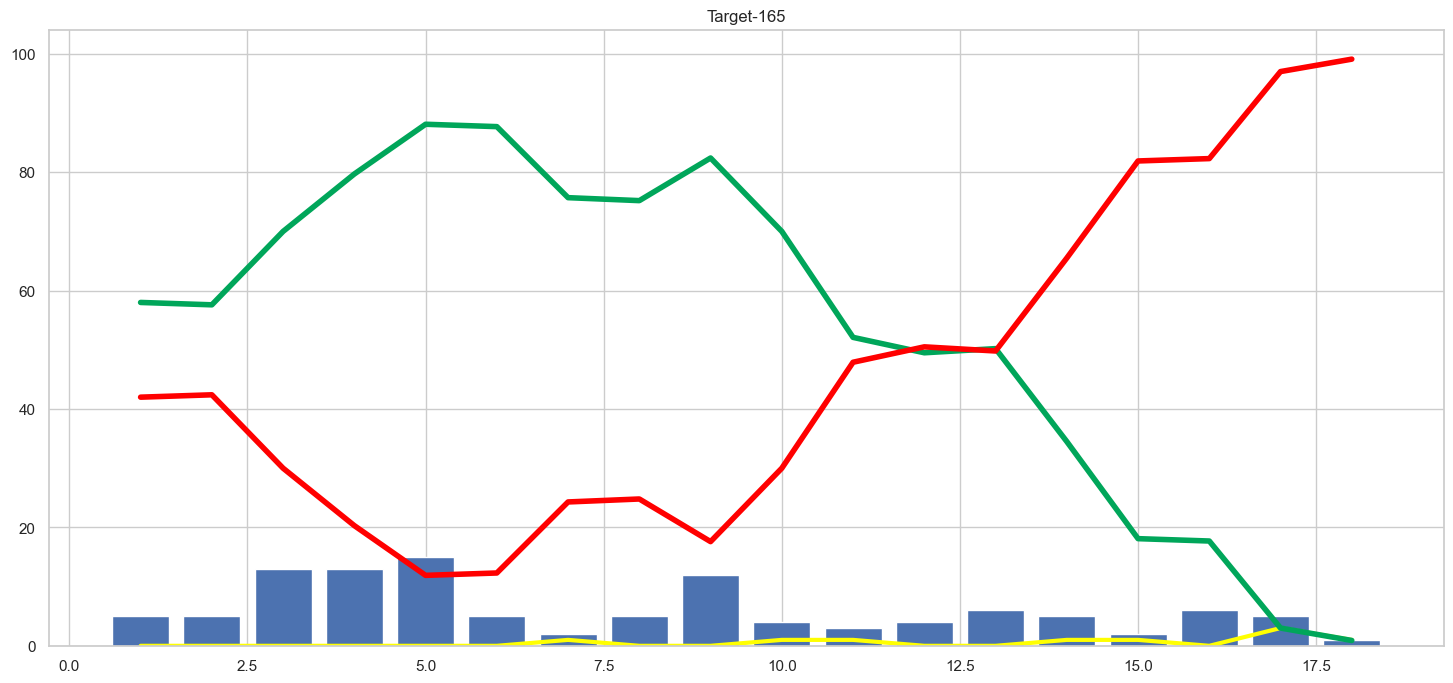

In [104]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,8))
plt.plot(temp_df['end_of_over'],temp_df['wickets_in_over'],color='yellow',linewidth=3)
plt.plot(temp_df['end_of_over'],temp_df['win'],color='#00a65a',linewidth=4)
plt.plot(temp_df['end_of_over'],temp_df['lose'],color='red',linewidth=4)
plt.bar(temp_df['end_of_over'],temp_df['runs_after_over'])
plt.title('Target-' + str(target))

on this graph was over by over wining probability.
in this graph was green line is win and red line was loss and yellow line is wickets on over


on this graph this is one match was target is 165. second inning will state the batting team win probability is 56% and bowling team probability is 44%.

on this macth 6 over is left the batting team winnig probability is 84% and bowling team probability is 16%.

but on 11 over left winning probability was 50-50 on both team was batting team was gives 3 wickets so batting team winning probability is decreas and bowling team winning probability was increas

in 14 and 15 over they give 2 more wickets batting team winning probability is decreas and bowling team winning probability was increas ,batting team winning probability is 17% and bowling team winning probabilit is 83% end of the 15 over

in over no 17 they give 3 wickects on one over team winning probability is again decreas and bowling team winning probability was again increas ,batting team winning probability is 3% and bowling team winning probabilit is 97% end of the 17 over

and the end of the 18 over bowling team winning the match ane the last probability is both team is batting team winning probability is 1% and bowling team winning probabilit is 99% 

####  bowling team winning the match

## finding total teams and city

In [105]:
teams

['Sunrisers Hyderabad',
 'Mumbai Indians',
 'Royal Challengers Bangalore',
 'Kolkata Knight Riders',
 'Kings XI Punjab',
 'Chennai Super Kings',
 'Rajasthan Royals',
 'Delhi Capitals',
 'Gujarat Titans',
 'Lucknow Super Giants']

In [106]:
df2['City'].unique()

array(['Ahmedabad', 'Kolkata', 'Mumbai', 'Navi Mumbai', 'Pune', 'Dubai',
       'Sharjah', 'Abu Dhabi', 'Delhi', 'Chennai', nan, 'Hyderabad',
       'Visakhapatnam', 'Chandigarh', 'Bengaluru', 'Jaipur', 'Indore',
       'Bangalore', 'Kanpur', 'Rajkot', 'Raipur', 'Ranchi', 'Cuttack',
       'Dharamsala', 'Kochi', 'Nagpur', 'Johannesburg', 'Centurion',
       'Durban', 'Bloemfontein', 'Port Elizabeth', 'Kimberley',
       'East London', 'Cape Town'], dtype=object)

## model save

In [107]:
import pickle
with open('pipe.pkl', 'wb') as file:
    pickle.dump(pipe, file)